<a href="https://colab.research.google.com/github/sasichintada/ml-workshop/blob/main/EDA(group).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Traffic Accident Prediction Dataset**                                        
This dataset contains data designed to predict the occurrence and severity of traffic accidents based on various factors affecting road conditions, driver behavior, and traffic situations.

**FEATURES**                                                                 


*  **Weather**: The impact of weather conditions on the likelihood of accidents.


* **Clear**: No adverse weather conditions.




*  **Rainy**: Rainy conditions increase the chance of accidents.


*  **Foggy**: Foggy conditions reduce visibility, increasing accident chances.   


*  **Snowy**: Snow can cause slippery roads and higher accident probability.
*  **Stormy**: Stormy weather can create hazardous driving conditions.                                                                  


* **Road_Type**: The type of road, influencing the probability of accidents.

* **Highway**: High-speed roads with higher chances of severe accidents

*  **City Road**: Roads within city limits, typically with more traffic and lower speeds.

* **Rural Road**: Roads outside urban areas, often with fewer vehicles and lower speeds.
*  **Mountain Road**: Roads with curves and elevation changes, increasing accident risk.   


* **Time_of_Day**: The time of day when the accident occurs.



* **Morning**: The period between sunrise and noon.
* **Afternoon**: The period between noon and evening.



* **Evening**: The period just before sunset.

* **Night**: The nighttime, often associated with reduced visibility and higher risk.

* **Traffic_Density**: The level of traffic on the road.                               

      0: Low density (few vehicles).                                            
      1: Moderate density.
      2: High density (many vehicles).


*  **Speed_Limit**: The maximum allowed speed on the road.



* **Number_of_Vehicles**: The number of vehicles involved in the accident, ranging from 1 to 5.
* **Driver_Alcohol**: Whether the driver consumed alcohol.

      0: No alcohol consumption.
      1: Alcohol consumption (which increases the likelihood of an accident).



*  **Accident_Severity**: The severity of the accident.

      Low: Minor accident.
      Moderate: Moderate accident with some damage or injuries.
      High: Severe accident with significant damage or injuries.

* **Road_Condition**: The condition of the road surface.

* **Dry**: Dry roads with minimal risk.

* **Wet**: Wet roads due to rain, increasing the risk of accidents.
*  **Icy**: Ice on the road, significantly increasing the risk of accidents.


* **Under Construction**: Roads under construction, which may have obstacles or poor road quality.


* **Vehicle_Type**: The type of vehicle involved in the accident.

      Car: A regular passenger car.
      Truck: A large vehicle used for transporting goods.
      Motorcycle: A two-wheeled motor vehicle.
      Bus: A large vehicle used for public transportation.


* **Driver_Age**: The age of the driver. Values range from 18 to 70 years old.

* **Driver_Experience**: The years of experience the driver has. Values range from 0 to 50 years of experience.



*  **Road_Light_Condition**: The lighting conditions on the road.

*  **Daylight**: Daytime, when visibility is typically good.
*   **Artificial Light**: Road is illuminated with streetlights.


* **No Light**: Road is not illuminated, typically during the night in poorly lit areas.


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#loading the data
traffic=pd.read_csv('/content/dataset_traffic_accident_prediction1.csv')

In [ ]:

traffic.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [ ]:
traffic.shape

(840, 14)

In [ ]:
traffic.Accident.unique()

array([ 0.,  1., nan])

In [ ]:
#checking the null values
traffic.isnull().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


In [ ]:
#calculating the percentage of missing data
total_rows = len(traffic)
missing_values = traffic.isnull().sum()
missing_percentage = (missing_values / total_rows) * 100
print(missing_percentage)

Weather                 5.0
Road_Type               5.0
Time_of_Day             5.0
Traffic_Density         5.0
Speed_Limit             5.0
Number_of_Vehicles      5.0
Driver_Alcohol          5.0
Accident_Severity       5.0
Road_Condition          5.0
Vehicle_Type            5.0
Driver_Age              5.0
Driver_Experience       5.0
Road_Light_Condition    5.0
Accident                5.0
dtype: float64


####**Data Cleaning**

In [ ]:
#as the percentage is very is 5% its better to impute them rather than dropping
categorical_columns = ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']
for col in categorical_columns:
    traffic[col] = traffic[col].fillna(traffic[col].mode()[0])


In [ ]:
#for numerical columns
numerical_columns = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']
for col in numerical_columns:
    traffic[col] = traffic[col].fillna(traffic[col].median())


In [ ]:
#Imputing other than the numerical and categorial column
traffic['Driver_Alcohol'] = traffic['Driver_Alcohol'].fillna(0)
traffic = traffic[traffic['Accident_Severity'].notnull()]
traffic['Accident'] = traffic['Accident'].fillna(traffic['Accident'].mode()[0])

In [ ]:
#checking the null values
traffic.isnull().sum()

,0
Weather,0
Road_Type,0
Time_of_Day,0
Traffic_Density,0
Speed_Limit,0
Number_of_Vehicles,0
Driver_Alcohol,0
Accident_Severity,0
Road_Condition,0
Vehicle_Type,0


###**Data Visualisation**

####**Distribution of speed_limit**

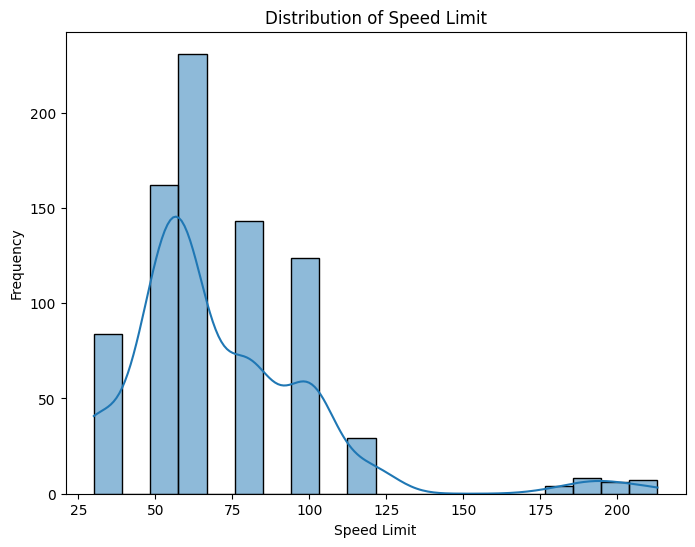

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#histplot
plt.figure(figsize=(8,6))
sns.histplot(traffic['Speed_Limit'], bins=20, kde=True)
plt.title('Distribution of Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.show()

####**Observations**


*  **Starting Point**:
The speed limit values start at 25, indicating the minimum speed limit recorded in the dataset.


* **Main Range of Distribution**:
The majority of speed limits fall between 50 and 75, showing that this is the most common range in the data.


* **Decrease in Frequency**:
As the speed limit increases beyond 75, the frequency drops significantly, indicating fewer instances of high speed limits.


* **Rare High Speed Limits**:
Speed limits near 150 are rare but present, suggesting outliers or areas with exceptionally high speed limits.


* **Slight Increase**:
After 150, there is a slight increase in frequency, possibly due to specific scenarios or regions with unique speed regulations.





  
   


####**Accident severity distribution**

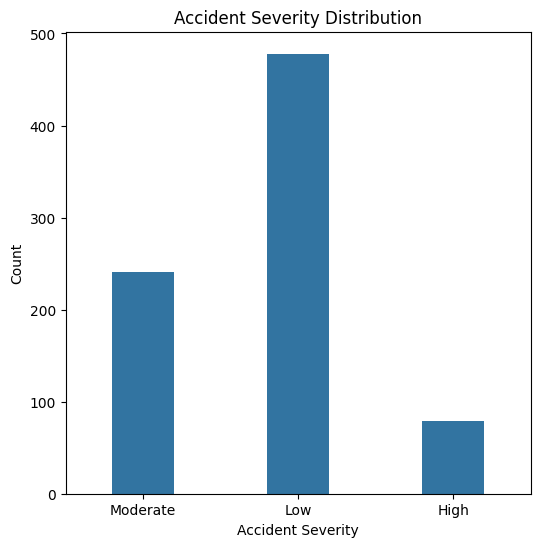

In [ ]:
#countplot
plt.figure(figsize=(6,6))
sns.countplot(x='Accident_Severity',data=traffic,width=0.4)
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

**Observations**


* **Low Severity**:

  Severity is classified as low when the accident severity score is above 400.
This suggests that accidents with high severity, but still classified as "low," may involve minor injuries or less significant damage.

* **Moderate Severity**:

  Severity is moderate when the score is between 200 and 300.
This range indicates accidents that are more serious than low severity but not as critical as high-severity accidents. It could involve moderate injuries or damage to vehicles.
* **High Severity**:

  Severity is considered high when the score is at 100.
Accidents in this category are likely to involve severe injuries, significant property damage, or even fatalities.

####**Speed limit vs severity**

Text(0, 0.5, 'Accident Severity')

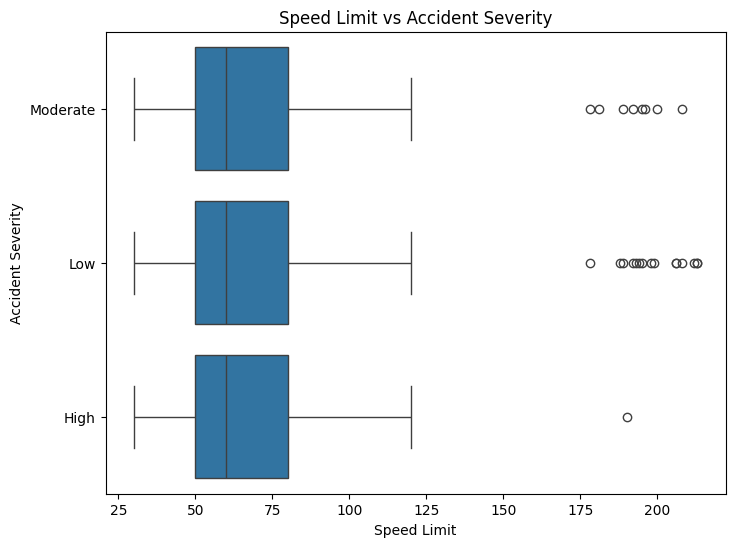

In [ ]:
#box plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Speed_Limit', y='Accident_Severity', data=traffic)
plt.title('Speed Limit vs Accident Severity')
plt.xlabel('Speed Limit')
plt.ylabel('Accident Severity')

**Observations**


* **Moderate Accident Severity**:

      Outliers: Moderate number of outliers, indicating that a small portion of accidents deviate significantly from the central range of severity.
      IQR: Lies between 50 and 75, suggesting that most moderate accidents fall in a consistent severity range.
      Insight: Moderate severity accidents display a relatively stable pattern with limited extreme cases.


* **High Accident Severity**:

      Outliers: Slightly more outliers than moderate severity, indicating higher variability and more extreme cases in severe accidents.
      IQR: Also between 50 and 75, which aligns with the range for moderate severity. This suggests that while the central tendency is similar, there are more severe outliers.
      Insight: High severity accidents, while generally falling in a predictable range, have a greater tendency for extreme severity due to higher speed limits or other factors.


* **Low Accident Severity**:

      Outliers: Fewer outliers compared to moderate and high severity, indicating less variability and fewer extreme cases.
      IQR: Similarly lies between 50 and 75, showing consistency in the range of severity for low-severity accidents.
      Insight: Low severity accidents tend to be predictable and stable, likely occurring at lower speed limits or in less hazardous conditions.




####**Pairplot for numerical features**

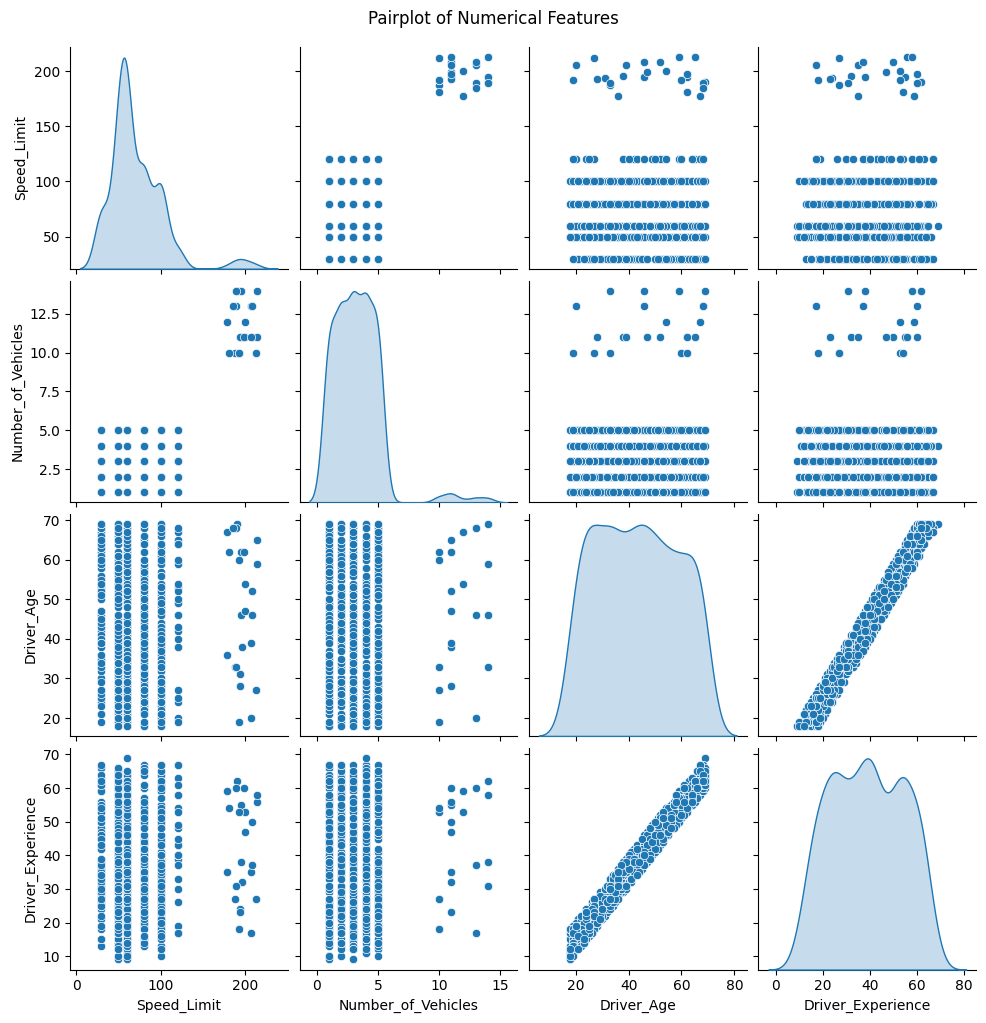

In [ ]:
sns.pairplot(traffic[['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

**Observations**



*  **Speed Limit**:

    Higher speed limits correlate with a greater number of vehicles involved in accidents.
Speed limits show a concentrated distribution at specific levels.


*  **Number of Vehicles**:

    Number of vehicles increases slightly with higher driver experience.
Clusters visible around common accident scenarios with fewer vehicles.



* **Driver Age**:

    Younger drivers are more common in accidents at higher speed limits.
Driver age has a moderate positive relationship with driver experience.


* **Driver Experience**:

    Strong positive correlation between driver age and experience.
Experience does not show a strong relationship with the number of vehicles.





####**Road Type and Accident Frequency**

<ipython-input-25-2f274065f571>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Road_Type", data=traffic, palette="muted")


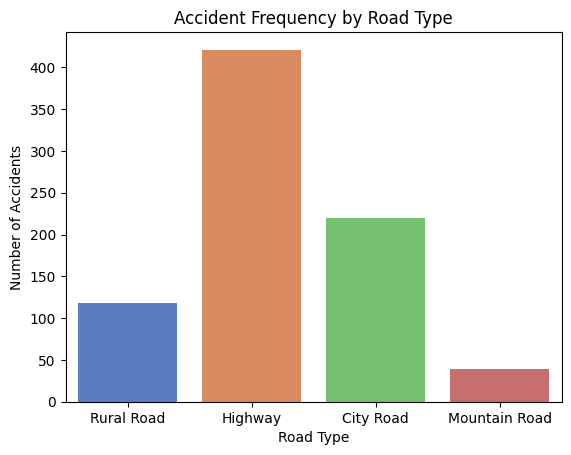

In [ ]:
sns.countplot(x="Road_Type", data=traffic, palette="muted")
plt.title("Accident Frequency by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.show()

**Observations**



* **Highways**:

      Accident Count: Over 400 accidents.
      Insight: Highways have the highest number of accidents, likely due to higher traffic density, speeds, and vehicle interactions.


* **City Roads**:

      Accident Count: Moderate, between 200 and 250.
      Insight: Urban settings have moderate accident numbers, possibly due to controlled traffic but frequent interactions at intersections.


* **Rural Roads**:

      Accident Count: Moderate, above 100.
      Insight: Rural roads have fewer accidents than highways and cities but still notable, likely due to mixed speed limits and road conditions.


* **Mountain Roads**:

      Accident Count: Less than 50.
      Insight: Mountain roads have the least accidents, potentially due to lower traffic density and cautious driving behavior.




####**Weather Conditions and Accident Severity**

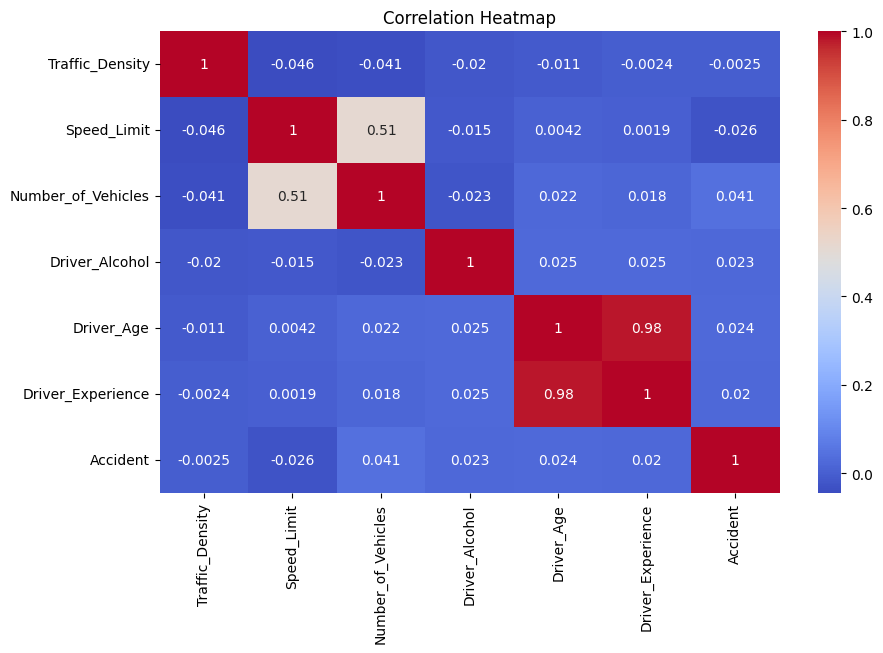

In [ ]:
#correlation matrix
numeric_traffic = traffic.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_traffic.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Observations**


* **Traffic Density**:

      Positive Correlation: High traffic density correlates with an increased number of accidents.
      Insight: Crowded areas lead to more interactions, increasing the likelihood of collisions.


* **Speed Limit**:

      Positive Correlation with Severity: Higher speed limits are associated with more severe accidents.
      Negative Correlation with Frequency: Fewer accidents occur at higher speed limits but tend to be more severe.


* **Number of Vehicles**:

      Positive Correlation: More vehicles involved correlate with higher accident severity.
      Insight: Multi-vehicle collisions often lead to greater impact and complexity.



* **Driver Alcohol Influence**:

      Strong Positive Correlation: Alcohol consumption by drivers significantly increases accident frequency and severity.
      Insight: Impaired judgment and slower reactions result in more critical accidents.



* **Driver Age**:

      U-shaped Correlation:Younger (18-25) and older (65+) drivers are more prone to accidents.Middle-aged drivers show lower accident rates.
      Insight: Experience and physical ability influence accident risk.



* **Driver Experience**:

      Negative Correlation: More experienced drivers are less likely to be involved in accidents.
      Insight: Experience reduces risk through better decision-making and hazard recognition.


* **Accident Severity**:

      Cumulative Influence: Severity increases with a combination of high speed, more vehicles, alcohol influence, and less experienced drivers.



####**Time of Day and Accident Trends**

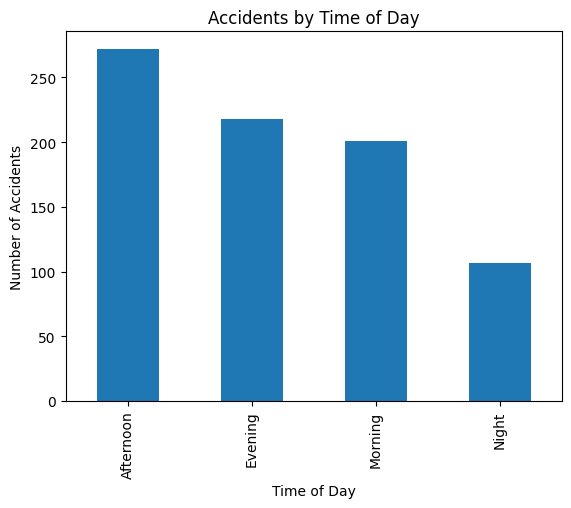

In [ ]:
traffic["Time_of_Day"].value_counts().sort_index().plot(kind="bar")
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.show()

**Observations**


* **Afternoon**:

      Accident Count: Above 250.
      Insight: Afternoon has the highest number of accidents, likely due to peak traffic hours and increased vehicular movement.


* **Evening** :
      Accident Count: Nearly 200.
      Insight: Evening accidents are slightly lower than the afternoon, possibly influenced by dim lighting and end-of-day traffic.


* **Morning**:

      Accident Count: Above 180.
      Insight: Morning accidents are moderately high, likely due to rush hour traffic and hurried driving.
    

* **Night**:

      Accident Count: Nearly 100.
      Insight: Night has the least number of accidents, potentially due to lower traffic volumes but might include severe accidents caused by fatigue or poor visibility.



####**Traffic Density and Accident Severity**

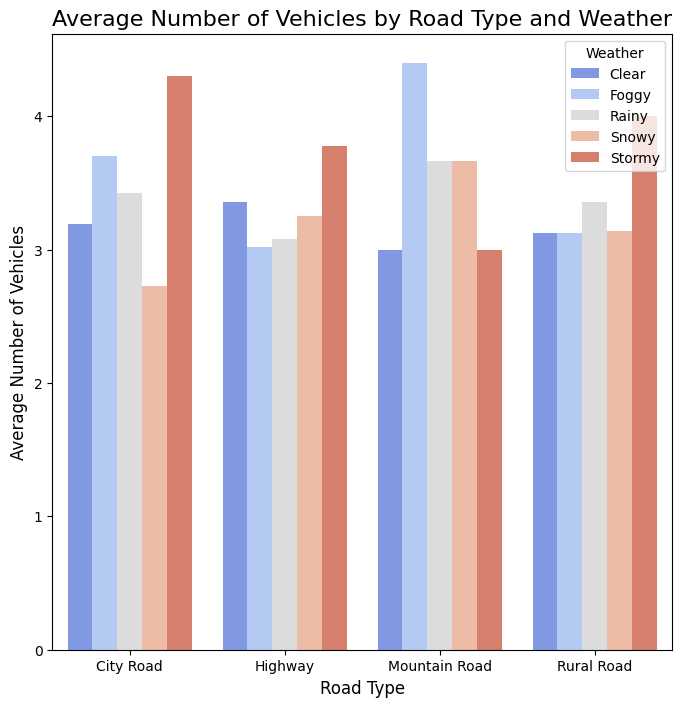

In [ ]:
traffic=traffic.groupby(['Road_Type', 'Weather'])['Number_of_Vehicles'].mean().reset_index()

#Plot a bar chart
plt.figure(figsize=(8, 8))
sns.barplot(data=traffic,x='Road_Type',y='Number_of_Vehicles',hue='Weather',palette='coolwarm')
plt.title('Average Number of Vehicles by Road Type and Weather', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Average Number of Vehicles', fontsize=12)
plt.legend(title='Weather', fontsize=10)
plt.show()

**Observations on the Bar Plot:**                     


* **Road Type and Vehicle Count**:                                                                      
  
    Highways generally show a higher average number of vehicles compared to city roads.Residential roads have the least average number of vehicles, indicating less traffic in such areas.

* **Weather Impact**:



      * Clear Weather: Consistently shows higher vehicle counts across all road types, likely due to favorable driving conditions.

      * Rainy Weather: Reduces the average number of vehicles, possibly due to cautious driving or reduced travel during adverse weather conditions.


* **Variation Between Road Types**:

    The difference in vehicle counts between clear and rainy weather is more pronounced on highways, suggesting that weather significantly impacts traffic on these roads.City roads and residential roads exhibit smaller variations in vehicle counts under different weather conditions.


In [ ]:
print(traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB
None


In [ ]:
print(traffic.describe())

       Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
count       798.000000   798.000000          798.000000      798.000000   
mean          1.001253    71.050125            3.286967        0.160401   
std           0.784894    32.052458            2.017267        0.367208   
min           0.000000    30.000000            1.000000        0.000000   
25%           0.000000    50.000000            2.000000        0.000000   
50%           1.000000    60.000000            3.000000        0.000000   
75%           2.000000    80.000000            4.000000        0.000000   
max           2.000000   213.000000           14.000000        1.000000   

       Driver_Age  Driver_Experience    Accident  
count  798.000000         798.000000  798.000000  
mean    43.259398          38.981203    0.299499  
std     15.129856          15.273201    0.458326  
min     18.000000           9.000000    0.000000  
25%     30.000000          26.000000    0.000000  
50%     43.000000 